In [7]:
import tensorflow as tf
import numpy as np
from NeuralFlow.flow import Flow_v2

In [8]:
def create_base_model(input_shape=1, output_shape=1):
    inputs = tf.keras.Input(shape=(input_shape,))
    x = tf.keras.layers.Dense(512, activation='relu')(inputs)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    outputs = tf.keras.layers.Dense(output_shape, activation='tanh')(x)
    return tf.keras.Model(inputs, outputs)


In [9]:
flow = Flow_v2(
    model_fn = create_base_model,
    n_models = 10,
    noise_stddev=1e-1, 
    lam = 1e-2)

In [10]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


def optimizer_fn():
    lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-3,
        decay_steps=1000,
        decay_rate=0.96)
    return tf.keras.optimizers.Adam(lr_scheduler)

flow.compile(optimizer_fn=optimizer_fn, loss_fn=loss_fn, metrics=['mae'])

In [11]:
X_train = tf.cast(np.linspace(0, 1, 1000).reshape(-1, 1), tf.float32)
y_train = tf.cast(np.sin(X_train * 2 * np.pi).reshape(-1, 1), tf.float32)

batch_size = 32
loader_size = X_train.shape[0] // batch_size

In [12]:
flow.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=50, memory_epochs = [2, 50])

Epoch 1/50


32/32 - 1s - 30ms/step - loss: 1492.9055 - mae: 0.4751
Epoch 2/50
32/32 - 0s - 5ms/step - loss: 463.6711 - mae: 0.2430
Epoch 3/50
32/32 - 0s - 5ms/step - loss: 304.5774 - mae: 0.1480
Epoch 4/50
32/32 - 0s - 5ms/step - loss: 280.8209 - mae: 0.1223
Epoch 5/50
32/32 - 0s - 5ms/step - loss: 276.2455 - mae: 0.1230
Epoch 6/50
32/32 - 0s - 5ms/step - loss: 272.4502 - mae: 0.1238
Epoch 7/50
32/32 - 0s - 6ms/step - loss: 268.2207 - mae: 0.1235
Epoch 8/50
32/32 - 0s - 6ms/step - loss: 264.8507 - mae: 0.1317
Epoch 9/50
32/32 - 0s - 6ms/step - loss: 248.8051 - mae: 0.1254
Epoch 10/50
32/32 - 0s - 6ms/step - loss: 231.2158 - mae: 0.1241
Epoch 11/50
32/32 - 0s - 6ms/step - loss: 203.0238 - mae: 0.1247
Epoch 12/50
32/32 - 0s - 6ms/step - loss: 160.5057 - mae: 0.1163
Epoch 13/50
32/32 - 0s - 6ms/step - loss: 122.0548 - mae: 0.1065
Epoch 14/50
32/32 - 0s - 5ms/step - loss: 83.8219 - mae: 0.0924
Epoch 15/50
32/32 - 0s - 5ms/step - loss: 75.5856 - mae: 0.0939
Epoch 16/50
32/32 - 0s - 5ms/step - loss: 38.

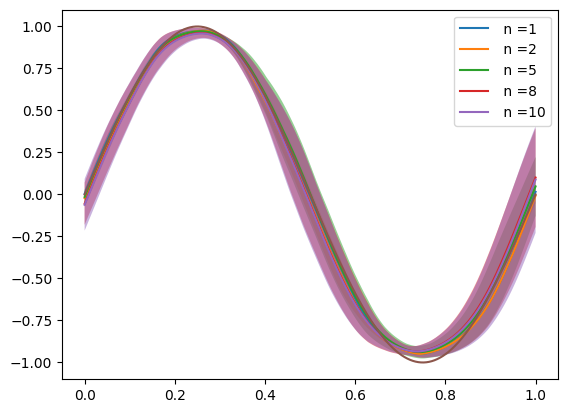

: 

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure()
for n in [1, 2, 5, 8, 10]:
    est = flow.get_estimator("deep_ensemble", n_models = n)
    mean, var = est(X_train)
    mean, var = mean[-1], var[-1]
    plt.plot(X_train, mean.squeeze(), label = f" n ={n}")
    plt.fill_between(tf.squeeze(X_train), mean.squeeze() - 1.96 * np.sqrt(var.squeeze()),  mean.squeeze() + 1.96 * np.sqrt(var.squeeze()), alpha=0.5)


plt.plot(X_train, y_train)
plt.legend()
plt.show()